# Treinamento dos modelos

Após o pré-processamento, utilizaremos mais 2 modelos de **aprendizado não-supervisionado**.

* clusterização: k-medoids (variação do k-means)
* recomendação: knn

Um deles será para fazer uma **clusterização** no banco de dados, ou seja, gerar possíveis grupos e visualiza-los em 2 dimensões (nnovamente PCA). Será utilizado o **K-medoids**, uma variação do k-means em que o centróide de inicialização começa em algum dos pontos.

Para **recomendação** será utilizado o **KNN** para identificar os vizinhos próximos aos do portfólio do usuário.

# Experimentos

Com o método do "cotovelo" ("*elbow*") aplicado com o k-means, vemos que o número mais adequado de clusters é _k = 10_

In [1]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from experimentos import Experimentos
from preprocessamento import *
from visualizacao import Visualizacao

#sns.palplot(sns.color_palette("Paired"))

In [2]:
configuraJupyter()

In [3]:
preproc = Preprocessamento()
experim = Experimentos()
viz = Visualizacao()

In [4]:
df, X_teste = experim.exec_experimentos()

Leitura dos dados 


Dimensões: (462298, 180)
Pré-processamento dados de treino 


Remoção das colunas 

Categorizando categóricas nominais como OUTROS 

Manipulação de colunas especificas 

Transformando colunas binárias 

Salvando tipo das variáveis 

Preenchimento dos missings das numéricas 

Preenchimento dos missings das categoricas 

Codificação one-hot-encoder 

Normalização das numéricas 

Redução de dimensionalidade 



In [5]:
df.shape

(462298, 27)

In [6]:
pca = PCA(2, random_state=42)

proj = pca.fit_transform(df)

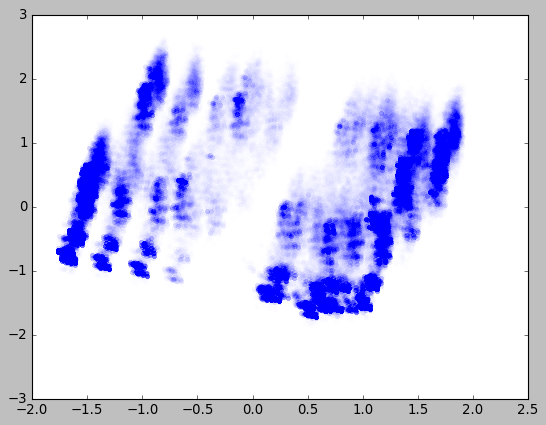

In [7]:
sns.scatterplot(x = proj[:, 0], y = proj[:, 1], alpha=.003)

In [8]:
#from sklearn_extra.cluster import KMedoids
# kmedoids = KMedoids(n_clusters=numClusters, random_state=0)

numClusters = 10
kmeans = KMeans(n_clusters=numClusters, random_state=42)

In [9]:
y_pred = kmeans.fit_predict(df)
#kmeans.predict(X_new)

In [10]:
aux_viz = pd.DataFrame({'x':proj[:, 0], 'y':proj[:, 1], 'cor':y_pred})

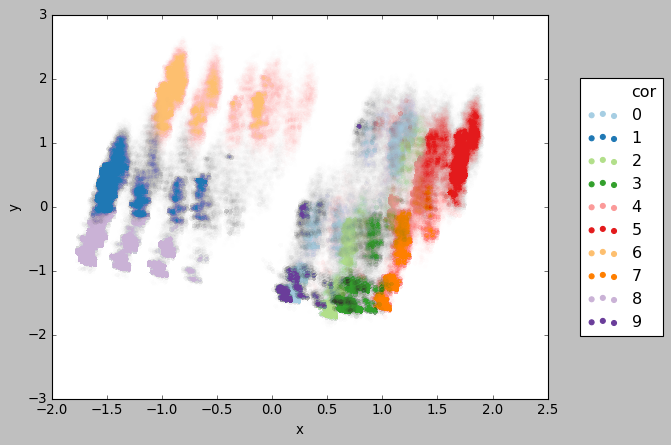

In [11]:
ax = sns.scatterplot(x="x", y="y",
                     hue="cor", alpha=.005,
                     palette="Paired",data=aux_viz)
#plt.legend(loc='best')
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
plt.show()

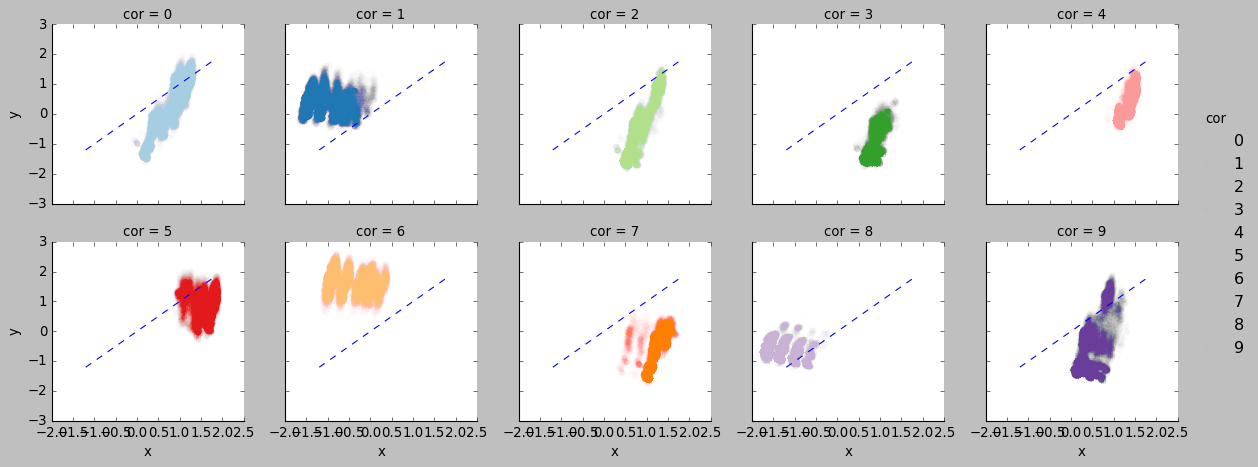

In [12]:
#cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
g = sns.FacetGrid(aux_viz, col="cor",  hue="cor", col_wrap=5, palette='Paired')
g = (g.map(plt.scatter, "x", "y", alpha=.005).add_legend())

#g.map(plt.axhline, y=0, ls='--', c='red')

for ax in g.axes.ravel():
    ax.plot((-1.2, 1.8), (-1.2, 1.8), ls='--', color='b')

plt.show()

In [19]:
preproc = Preprocessamento()

In [22]:
proj_tSNE = preproc.reducao_viz(df, perplexity=30)

Dimensão do treino: (23114, 27)
Treinando T-sne: TSNE(perplexity=30, random_state=42) 

Tempo execucao: 0:05:29.306835 



In [15]:
y_pred[0:32]

array([0, 2, 7, 3, 7, 5, 7, 3, 9, 1, 8, 1, 3, 2, 0, 4, 4, 0, 9, 8, 7, 1,
       8, 1, 3, 5, 1, 1, 3, 4, 9, 1])

In [16]:
np.sort(preproc.linhasTsne)

array([     6,     30,     31, ..., 462224, 462241, 462255])

In [17]:
y_pred[np.sort(preproc.linhasTsne)]

array([7, 9, 1, ..., 7, 8, 7])

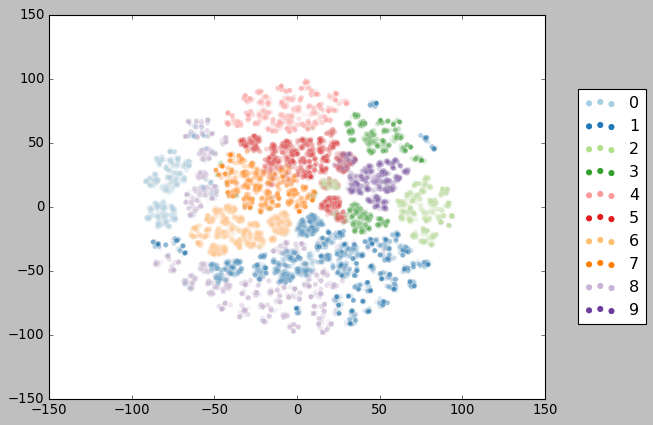

In [47]:
ax = sns.scatterplot(x=proj_tSNE[:, 0], y=proj_tSNE[:, 1],
                     hue=y_pred[np.sort(preproc.linhasTsne)], alpha=.05,
                     palette="Paired")
#plt.legend(loc='best')
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
plt.show()

In [30]:
aux_tsne = pd.DataFrame({'x':proj_tSNE[:, 0], 'y':proj_tSNE[:, 1], 'cor':y_pred[np.sort(preproc.linhasTsne)]})

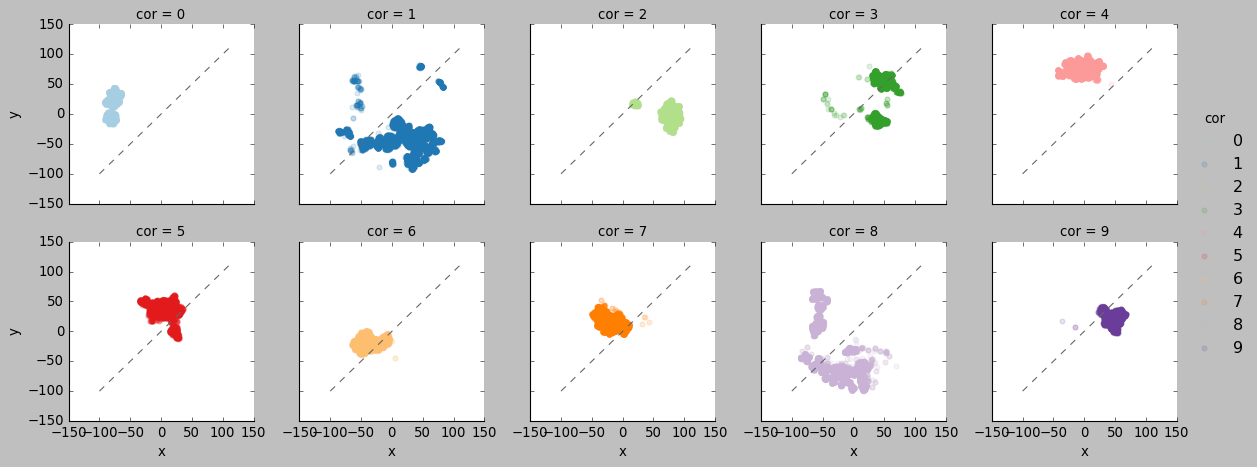

In [48]:
#cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
g = sns.FacetGrid(aux_tsne, col="cor",  hue="cor", col_wrap=5, palette='Paired')
g = (g.map(plt.scatter, "x", "y", alpha=.15).add_legend())

#g.map(plt.axhline, y=0, ls='--', c='red')

for ax in g.axes.ravel():
    ax.plot((-100, 110), (-100, 110), ls='--', color='0.4')

plt.show()